In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Objectives:

* Analyze AQI Trends: Examine the temporal variations in AQI values across cities and stations.
* Compare Air Quality Across Regions: Identify regions with consistently poor air quality.
* Correlate Pollutants with AQI: Study the relationship between individual pollutants and the AQI.
* Classify AQI Levels: Categorize AQI into different air quality levels (Good, Moderate, Unhealthy, etc.).
* Forecast AQI: Predict future AQI levels using historical data.
* Provide Policy Recommendations: Suggest measures to improve air quality in areas with high pollution.
* Assess Data Quality: Clean and validate the dataset for accurate analysis.

# problem statement:

The goal is to **predict the Air Quality Index (AQI) for different cities and stations based on historical air quality data**, identifying key factors that influence pollution levels and providing insights to improve air quality management.



In [220]:
df = pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [221]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [222]:
df.shape

(29531, 16)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [224]:
missing_values = df.isnull().sum()
print(missing_values)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [225]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [226]:
df.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


# Data Visulaization:

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 10000x4000 with 0 Axes>

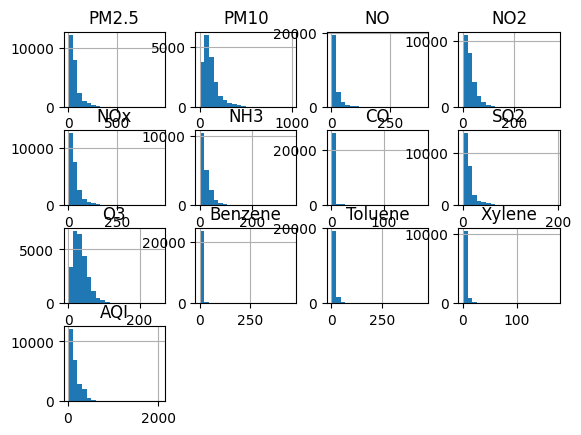

In [227]:
plt.figure(figsize=(100, 40))

df.hist(bins=20)

# Data Cleaning:

In [228]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [229]:
df.drop(columns=['Xylene'],inplace = True)
df.drop(columns=['AQI_Bucket'],inplace = True)

In [230]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000


In [231]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29526,False
29527,False
29528,False
29529,False


In [232]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0


In [233]:
df["PM2.5"].fillna(df["PM2.5"].median(), inplace=True)
df["PM10"].fillna(df["PM10"].median(), inplace=True)
df["NO"].fillna(df["NO"].median(), inplace=True)
df["NO2"].fillna(df["NO2"].median(), inplace=True)
df["NOx"].fillna(df["NOx"].median(), inplace=True)
df["NH3"].fillna(df["NH3"].median(), inplace=True)
df["CO"].fillna(df["CO"].median(), inplace=True)
df["SO2"].fillna(df["SO2"].median(), inplace=True)
df["O3"].fillna(df["O3"].median(), inplace=True)
df["Benzene"].fillna(df["Benzene"].median(), inplace=True)
df["Toluene"].fillna(df["Toluene"].median(), inplace=True)
df["AQI"].fillna(df["AQI"].median(), inplace=True)


<ipython-input-233-24a0df6de7b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(), inplace=True)
<ipython-input-233-24a0df6de7b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

#  Feature Engineering

In [234]:
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Extract the month
df['Month'] = df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# droping previous column
df.drop("Date", axis=1, inplace=True)

In [235]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,DayOfWeek
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,3
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,4
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,5
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,6
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,2020,6,5
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,2020,6,6
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,2020,6,0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,2020,6,1


# Correlation analysis

In [236]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['City'] = labelencoder.fit_transform(df['City'])



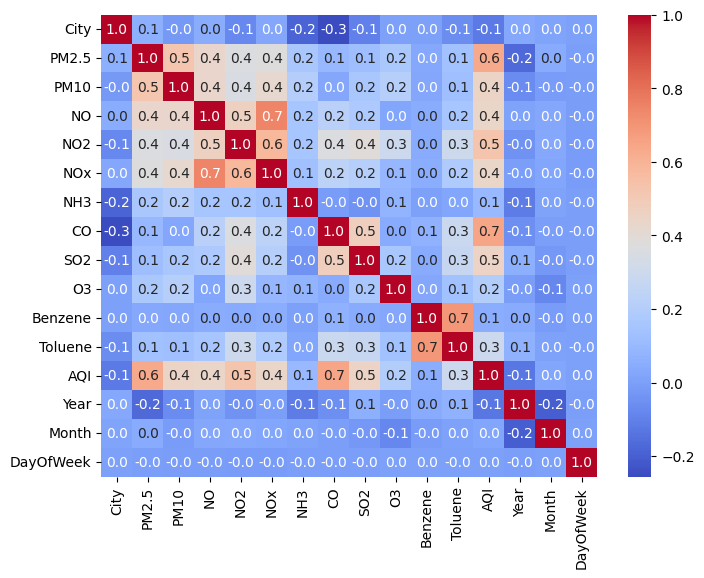

In [237]:
cor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

In [238]:

s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


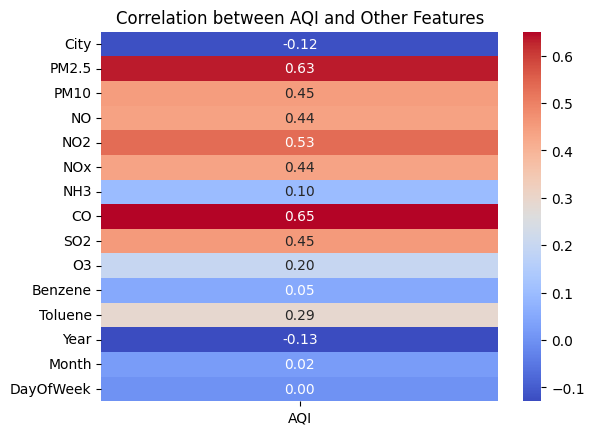

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'AQI' and all other columns
AQI_corr = df.corr()['AQI']

# Remove the correlation of 'AQI' with itself (which is always 1)
AQI_corr = AQI_corr.drop('AQI')

# Create a heatmap to visualize the correlations
sns.heatmap(AQI_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between AQI and Other Features')
plt.show()

In [240]:
df.drop("Benzene", axis=1, inplace=True)
df.drop("Month",axis=1,inplace=True)
df.drop("DayOfWeek",axis=1,inplace=True)
df.drop("City",axis=1,inplace=True)
df.drop("Toluene",axis=1,inplace=True)
df.drop("NH3",axis=1,inplace=True)
df.drop("O3",axis=1,inplace=True)
df.drop("Year",axis=1,inplace=True)
df.drop("NO",axis=1,inplace=True)
# df.drop("NO2",axis=1,inplace=True)

# Skewness Detection

In [241]:
df

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,48.57,95.68,18.22,17.15,0.92,27.64,118.0
1,48.57,95.68,15.69,16.46,0.97,24.55,118.0
2,48.57,95.68,19.30,29.70,17.40,29.07,118.0
3,48.57,95.68,18.48,17.97,1.70,18.59,118.0
4,48.57,95.68,21.42,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,19.54,0.47,8.55,41.0
29527,24.38,74.09,26.06,16.53,0.52,12.72,70.0
29528,22.91,65.73,29.53,18.33,0.48,8.42,68.0
29529,16.64,49.97,29.26,18.80,0.52,9.84,54.0


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

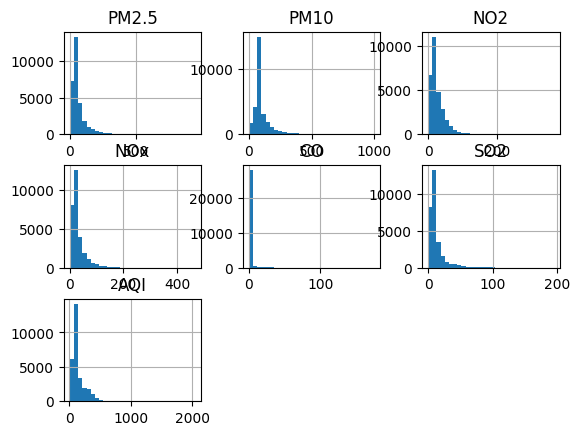

In [242]:
df.hist(bins=30)

In [243]:
import numpy as np
df["PM2.5"]=np.log1p(df["PM2.5"])
df["PM10"]=np.log1p(df["PM10"])
df["CO"]=np.log1p(df["CO"])
df["SO2"]=np.log1p(df["SO2"])
df["NOx"]=np.log1p(df["NOx"])
df["NO2"]=np.log1p(df["NO2"])


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >]],
      dtype=object)

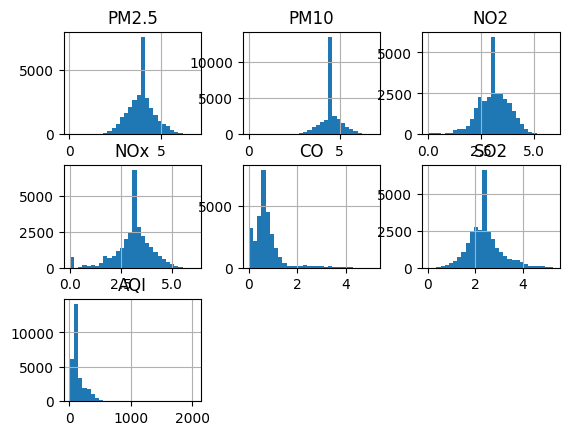

In [244]:
df.hist(bins=30)

<Axes: >

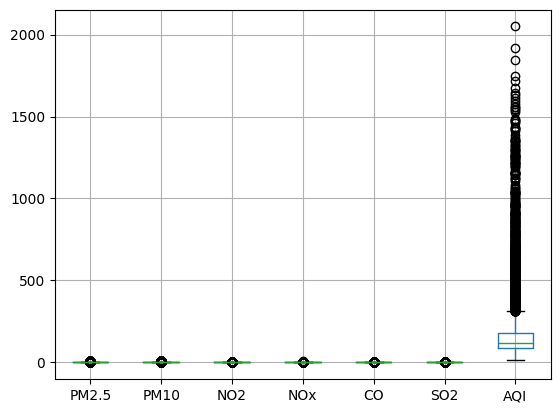

In [245]:
df.boxplot()

In [246]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='AQI')
df_cleaned


,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,118.0
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,118.0
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,118.0
14,3.903386,4.571407,2.888147,2.867899,0.470004,3.397524,118.0
34,4.402442,4.571407,3.170945,3.218876,1.214913,3.285787,294.0
...,...,...,...,...,...,...,...
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,41.0
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,70.0
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,68.0
29529,2.870169,3.931237,3.409827,2.985682,0.418710,2.383243,54.0


In [247]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 7446.352632733022, RMSE: 86.29225129021158, R-squared: 0.5162774053061419


# Data Scaling:

In [248]:
from sklearn.preprocessing import MinMaxScaler

features=["PM2.5","PM10","NOx","NO2",]

scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(df[features])
df1 = pd.DataFrame(scaled_data, columns=features, index=df.index)

<Axes: >

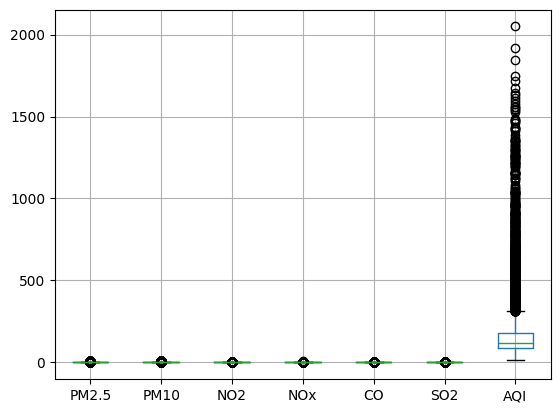

In [251]:
df.boxplot()

In [252]:
df.shape

(29531, 7)

In [253]:
df["AQI"]=np.log1p(df["AQI"])

array([[<Axes: title={'center': 'AQI'}>]], dtype=object)

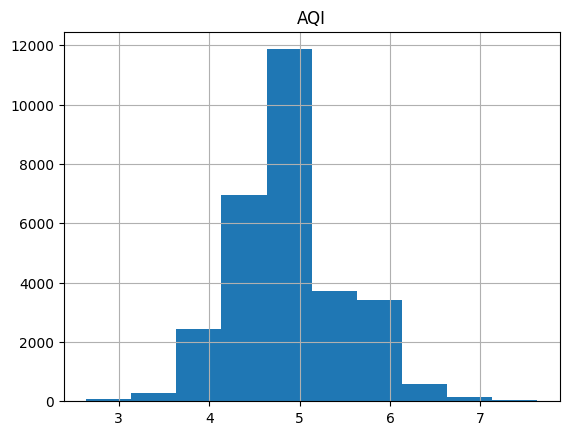

In [254]:
df.hist('AQI')

In [255]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.11050391573456687, RMSE: 0.3324212925409064, R-squared: 0.6970255605395321


In [256]:
df.shape

(29531, 7)

In [257]:
df

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,3.010621,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.109953,3.657389,3.139833,3.697096,4.779123
...,...,...,...,...,...,...,...
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,3.409827,2.985682,0.418710,2.383243,4.007333


# Another prediction methods:


In [258]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [259]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)
from sklearn.preprocessing import StandardScaler

In [260]:

X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2"]]  # Features
y = df['AQI'] # Target variable

In [261]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
x_train

,PM2.5,PM10,NOx,CO,SO2
7888,3.903386,4.571407,2.714032,0.641854,2.121063
9129,3.888959,4.571407,2.838493,0.593327,2.119863
3224,3.903386,4.571407,3.199489,0.636577,2.318458
21810,4.235989,4.571407,2.998728,0.604316,2.122262
21223,4.509980,4.571407,3.411148,0.712950,2.002830
...,...,...,...,...,...
13059,4.250493,4.571407,3.199489,0.703098,1.702928
8883,3.758172,4.571407,3.377246,0.536493,2.463002
8978,4.268718,4.571407,2.671386,0.582216,2.250239
9198,4.138840,4.571407,3.284289,0.662688,2.010895


In [263]:
y_train


,AQI
6688,5.786897
29333,4.859812
27996,3.850148
26848,4.779123
21186,4.248495
...,...
21575,4.262680
5390,4.304065
860,4.779123
15795,4.624973


In [264]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [265]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [266]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [267]:
# Dictionary to store the results
results = {}

In [268]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [269]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.234559  0.333837  0.691827
Ridge Regression          0.234564  0.333838  0.691826
Lasso Regression          0.453991  0.601499 -0.000450
ElasticNet Regression     0.453991  0.601499 -0.000450
Decision Tree             0.220741  0.353582  0.654294
Random Forest             0.160323  0.253071  0.822904
Gradient Boosting         0.180922  0.272406  0.794809
Support Vector Regressor  0.175917  0.268259  0.801009
K-Nearest Neighbors       0.163965  0.257417  0.816769
Neural Network            0.182716  0.271113  0.796752
